# Capstone Project - Predicting Traffic Accident Severity

## 1. Introduction

Road traffic injuries are currently estimated to be the eighth leading cause of death across all age groups globally, and are predicted to become the seventh leading cause of death by 2030.

Analysing a significant range of factors, including weather conditions, special events, roadworks, traffic jams among others, an accurate prediction of the severity of the accidents can be performed.

These insights, could allow law enforcement bodies to allocate their resources more effectively in advance of potential accidents, preventing when and where a severe accidents can occur as well as saving both, time and money. In addition, this knowledge of a severe accident situation can be warned to drivers so that they would drive more carefully or even change their route if it is possible or to hospital which could have set everything ready for a severe intervention in advance.

Governments should be highly interested in accurate predictions of the severity of an accident, in order to reduce the time of arrival and thus save a significant amount of people each year. Others interested could be private companies investing in technologies aiming to improve road safeness.

The Seattle government is going to prevent avoidable car accidents by employing methods that alert drivers through alert display system and police to be more careful in critical situations.In most cases, not paying enough attention during driving, drugs and alcohol or driving at very high speed for fun/competition are the main causes of occurring accidents that can be prevented by deploying harsher regulations. Besides the aforementioned causes, weather, visibility, or road conditions are the major uncontrollable factors that can be prevented by revealing hidden patterns in the data and announcing warning to the local government, police and drivers on the targeted roads.

The target audience of the project is local Seattle government, police, rescue groups and insurance organisation as well. This model results will provide them to make insightful decisions for reducing the number of accidents for the city.

## 2. Data 

The data was collected by the Seattle Police Department and Accident Traffic Records Department from 2004 to present. The data consists of 37 independent variables and 194,673 rows. The dependent variable, “SEVERITYCODE”, contains numbers that correspond to different levels of severity caused by an accident from 1 to 2. 

Furthermore, because of the existence of null values in some records, the data needs to be preprocessed before any further processing. Among all the features, I believe the following features have the most influence in the accuracy of the predictions:

“WEATHER”,
“ROADCOND”,
“LIGHTCOND”
The target variable is “SEVERITYCODE”.


The models aim was to predict the severity of an accident, considering that, the variable of
Severity Code was in the form of 1 (Property Damage Only) and 2 (Injury Collision) which were encoded
to the form of 0 (Property Damage Only) and 1 (Injury Collision). Furthermore, the Y was given value of 1
whereas N and no value was given 0 for the variables Inattention, Speeding and Under the influence. For
lighting condition, Light was given 0 along with Medium as 1 and Dark as 2. For Road Condition, Dry was
assigned 0, Mushy was assigned 1 and Wet was given 2. As for Weather Condition, 0 is Clear, Overcast is
1, Windy is 2 and Rain and Snow was given 3. 0 was assigned to the element of each variable which can
be the least probable cause of severe accident whereas a high number represented adverse condition
which can lead to a higher accident severity. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

## 3. Missing Values


In [2]:
df = pd.read_csv('Data-Collisions.csv', index_col=0)
df.head(5)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.shape

(194673, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 2 to 1
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   X               189339 non-null  float64
 1   Y               189339 non-null  float64
 2   OBJECTID        194673 non-null  int64  
 3   INCKEY          194673 non-null  int64  
 4   COLDETKEY       194673 non-null  int64  
 5   REPORTNO        194673 non-null  object 
 6   STATUS          194673 non-null  object 
 7   ADDRTYPE        192747 non-null  object 
 8   INTKEY          65070 non-null   float64
 9   LOCATION        191996 non-null  object 
 10  EXCEPTRSNCODE   84811 non-null   object 
 11  EXCEPTRSNDESC   5638 non-null    object 
 12  SEVERITYCODE.1  194673 non-null  int64  
 13  SEVERITYDESC    194673 non-null  object 
 14  COLLISIONTYPE   189769 non-null  object 
 15  PERSONCOUNT     194673 non-null  int64  
 16  PEDCOUNT        194673 non-null  int64  
 17  PEDCYLCOUNT    

From the summary of the data we see that the data types are coherent with their respective values, with the only exception of the date, and that some features have missing values.

More than half of the values for the coordenates are missing, as well as roughly a 10% of the data regarding the road_num and more than a 50% of the remaining samples are a 0. Thus, to keep the amount of samples the mentioned features will be dropped in addition to features where the values are missing.

In [5]:
# missing values
df.isna().sum()

X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [6]:
df = df.rename(columns = {'SEVERITYCODE.1':'SEVERITYCODE'})

In [7]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [8]:
df.groupby(["WEATHER"])["SEVERITYCODE"].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

In [9]:
df["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [10]:
df["LIGHTCOND"].value_counts()


Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [11]:
df['time'] = pd.to_datetime(df['INCDTTM'])


df['Month']   = df['time'].dt.strftime('%b')
df['Hour']    = df['time'].dt.hour
df['Weekday'] = df['time'].dt.strftime('%a')

### Accidents  vs Weather visualization

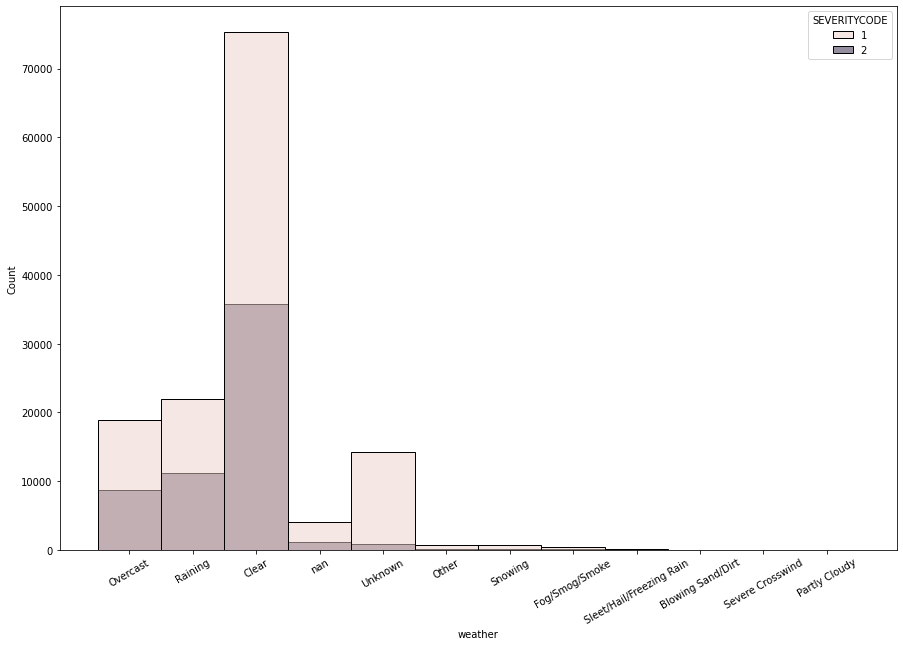

In [12]:
df['weather'] = df['WEATHER'].astype('str')

plt.figure(figsize=(15,10))
ax = sns.histplot(x="weather", hue="SEVERITYCODE", data=df)
plt.setp(ax.get_xticklabels(), rotation=30);

### Accidents vs Weekdays Visualization

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

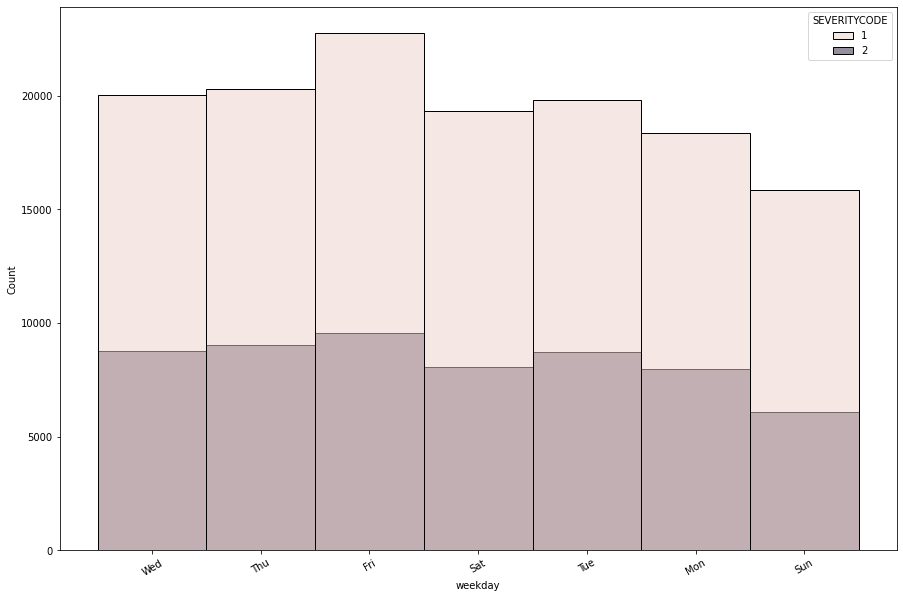

In [13]:
df['weekday'] = df['Weekday'].astype('str')

plt.figure(figsize=(15,10))
ax = sns.histplot(x="weekday", hue="SEVERITYCODE", data=df)
plt.setp(ax.get_xticklabels(), rotation=30)

### Accidents vs Light Condition Visualization

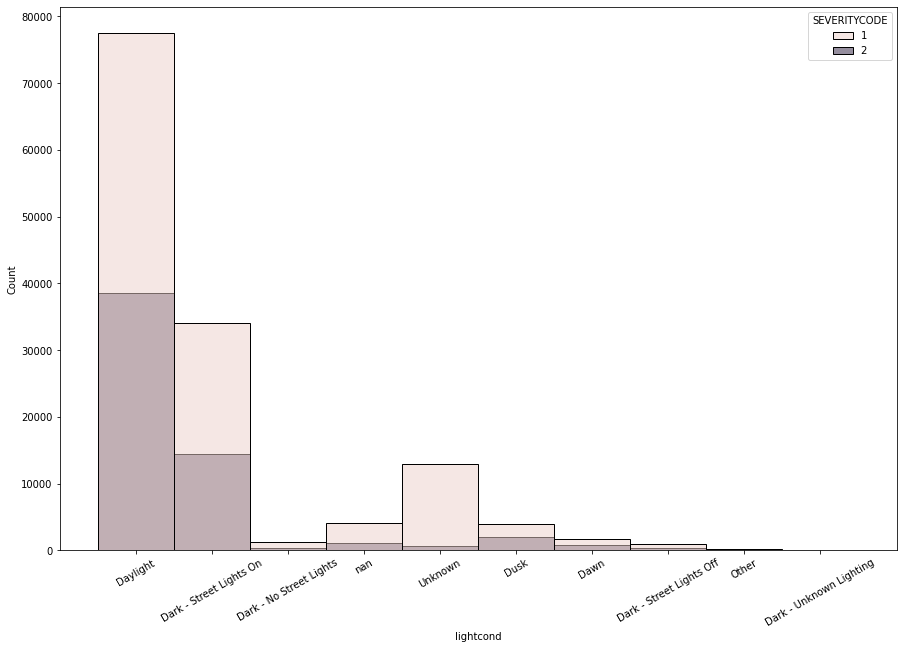

In [14]:
df['lightcond'] = df['LIGHTCOND'].astype('str')

plt.figure(figsize=(15,10))
ax = sns.histplot(x="lightcond", hue="SEVERITYCODE", data=df)
plt.setp(ax.get_xticklabels(), rotation=30);

### Accidents vs Road Condition Visualization

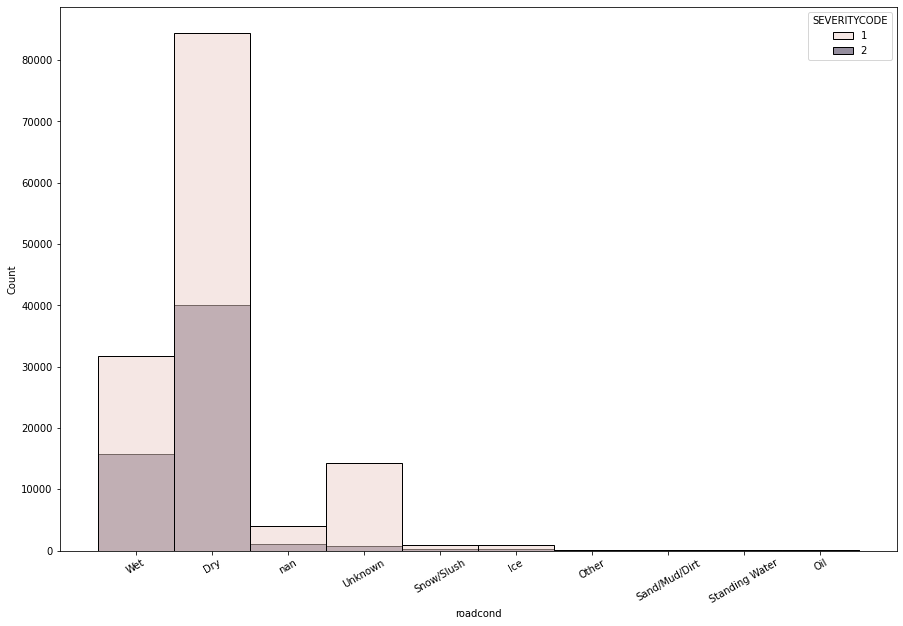

In [15]:
df['roadcond'] = df['ROADCOND'].astype('str')

plt.figure(figsize=(15,10))
ax = sns.histplot(x="roadcond", hue="SEVERITYCODE", data=df)
plt.setp(ax.get_xticklabels(), rotation=30);

### Accidents vs Junction Type Visualization

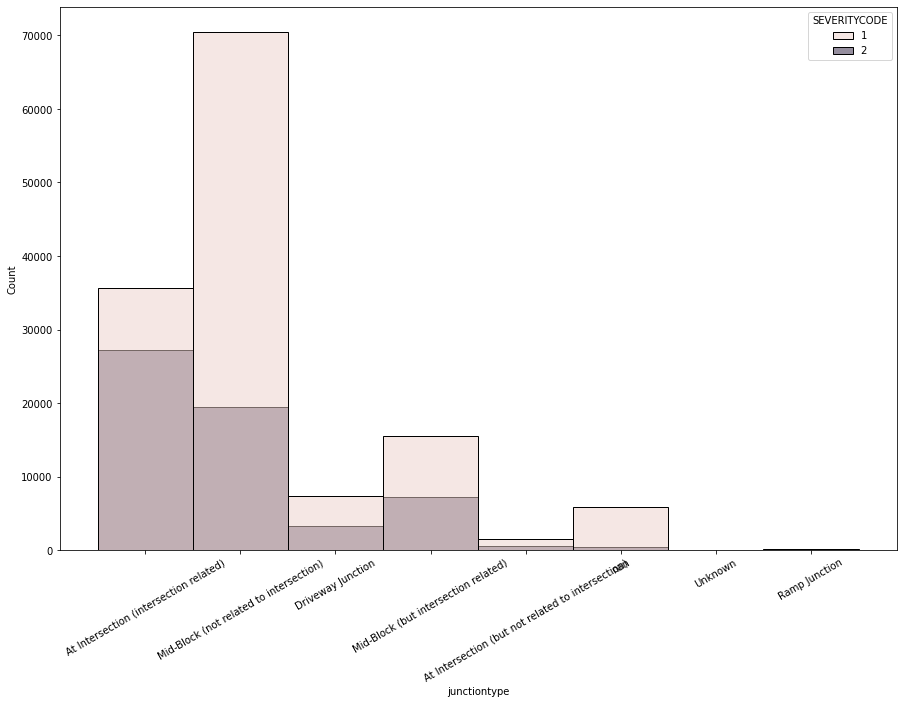

In [16]:
df['junctiontype'] = df['JUNCTIONTYPE'].astype('str')

plt.figure(figsize=(15,10))
ax = sns.histplot(x="junctiontype", hue="SEVERITYCODE", data=df)
plt.setp(ax.get_xticklabels(), rotation=30);

In [36]:
from sklearn.utils import resample
pre_df_maj = df[df.SEVERITYCODE==1]
pre_df_min = df[df.SEVERITYCODE==2]

pre_df_maj_dsample = resample(pre_df_maj,
                              replace=False,
                              n_samples=50000,
                              random_state=123)

pre_df_min_sample = resample(pre_df_min,replace = False,n_samples = 50000,random_state=123)
balanced_df = pd.concat([pre_df_maj_dsample, pre_df_min_sample])

balanced_df.SEVERITYCODE.value_counts()

2    50000
1    50000
Name: SEVERITYCODE, dtype: int64

In [37]:
balanced_df.head(5)
balanced_df.shape

(100000, 46)

In [38]:
df_Seattle = balanced_df[["WEATHER","ROADCOND","LIGHTCOND"]]

In [39]:
#df_Seattle.dropna(inplace = True)
df_Seattle.shape

(100000, 3)

In [40]:
balanced_df_w = balanced_df['WEATHER']
balanced_df_w.head()

SEVERITYCODE
1    Raining
1      Clear
1    Unknown
1      Clear
1      Clear
Name: WEATHER, dtype: object

In [41]:
#balanced_df_w.dropna(inplace=True)
balanced_df_w.shape

(100000,)

In [42]:
df_Seattle = pd.concat([df_Seattle,pd.get_dummies(balanced_df_w)], axis=1)

df_Seattle.head()

,WEATHER,ROADCOND,LIGHTCOND,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
SEVERITYCODE,,,,,,,,,,,,,,
1,Raining,Wet,Dark - Street Lights On,0,0,0,0,0,0,1,0,0,0,0
1,Clear,Dry,Daylight,0,1,0,0,0,0,0,0,0,0,0
1,Unknown,Unknown,Unknown,0,0,0,0,0,0,0,0,0,0,1
1,Clear,Dry,Daylight,0,1,0,0,0,0,0,0,0,0,0
1,Clear,Dry,Daylight,0,1,0,0,0,0,0,0,0,0,0


In [43]:
df_Seattle.shape

(100000, 14)

In [44]:
df_Seattle.drop(['Unknown'], axis = 1,inplace=True)
df_Seattle.drop(["WEATHER"],axis =1 , inplace = True)

In [45]:
df_Seattle.shape

(100000, 12)

In [46]:
df_Seattle = pd.concat([df_Seattle,pd.get_dummies(balanced_df["ROADCOND"])], axis=1)
df_Seattle.head(5)

,ROADCOND,LIGHTCOND,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,...,Snowing,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
1,Wet,Dark - Street Lights On,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,Dry,Daylight,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Unknown,Unknown,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Dry,Daylight,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Dry,Daylight,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [47]:
df_Seattle.drop(['Unknown'], axis = 1,inplace=True)
df_Seattle.drop(["ROADCOND"],axis =1 , inplace = True)
df_Seattle.shape

(100000, 19)

In [48]:
df_Seattle = pd.concat([df_Seattle,pd.get_dummies(balanced_df["LIGHTCOND"])], axis=1)
df_Seattle.shape

(100000, 28)

In [49]:
df_Seattle.drop(['Unknown'], axis = 1,inplace=True)
df_Seattle.drop(["LIGHTCOND"],axis =1 , inplace = True)
df_Seattle.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
X = df_Seattle

y = balanced_df["SEVERITYCODE"].values
y[0:5]

array([1, 1, 1, 1, 1])

## Normalizing the data

In [55]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (70000, 26) (70000,)
Test set: (30000, 26) (30000,)


## K-Nearest Neighbor (KNN)

In [56]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, jaccard_score

from sklearn.model_selection import train_test_split
from sklearn import preprocessing


def plot_conf_mat(y_true, y_pred, title, labels=['0', '1']):
    confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    conf_matrix = pd.DataFrame(
        data=confmat,
        columns=['Predicted:{}'.format(label) for label in labels],
        index=['Actual:{}'.format(label) for label in labels])
    sns.heatmap(
        conf_matrix, 
        annot=True,
        fmt='d',
        cmap="coolwarm").set_title(title, fontsize=16)
    plt.show()
    return

In [57]:
# HyperParameter tuning 

best_k = -1
best_acc = -1
for k in range(1, 10):
    knn_cl = knn(n_neighbors = k)
    knn_cl.fit(X_train, y_train)
    y_pred = knn_cl.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print("k = {} ; Mean Accuracy = {}".format(k, acc_score))
    if acc_score > best_acc:
        best_k = k
        best_acc = acc_score

print("Best k =", best_k)

k = 1 ; Mean Accuracy = 0.5129333333333334
k = 2 ; Mean Accuracy = 0.5026333333333334
k = 3 ; Mean Accuracy = 0.5412666666666667
k = 4 ; Mean Accuracy = 0.49883333333333335
k = 5 ; Mean Accuracy = 0.49903333333333333
k = 6 ; Mean Accuracy = 0.4984
k = 7 ; Mean Accuracy = 0.501
k = 8 ; Mean Accuracy = 0.5020333333333333
k = 9 ; Mean Accuracy = 0.5417
Best k = 9


In [58]:
# Final Model with best value of k

knn_final = knn(n_neighbors = best_k)
knn_final.fit(X_train, y_train)
y_pred_knn = knn_final.predict(X_test)

knn_final

KNeighborsClassifier(n_neighbors=9)

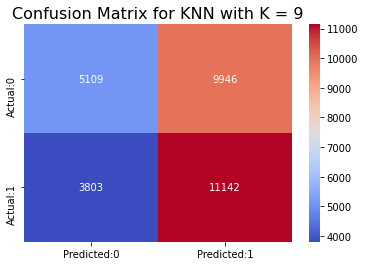

In [59]:
plot_conf_mat(y_test, y_pred_knn, "Confusion Matrix for KNN with K = {}".format(best_k))

In [72]:
from sklearn.metrics import log_loss
f1 = f1_score(y_test, y_pred_knn, average='weighted')
print("KNN F1-score: %.2f" % f1 )

KNN F1-score: 0.52


## Decision Tree

In [64]:
# HyperParameter tuning 

best_d = -1
best_f1 = -1

for d in (range(1, 20)):
    dt_cl = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt_cl.fit(X_train, y_train)
    y_pred = dt_cl.predict(X_test)
    f1_sc = f1_score(y_test, y_pred, average = 'weighted')
    print("k = {} ; F1 Score = {}".format(d, f1_sc))
    if f1_sc > best_f1:
        best_d = d
        best_f1 = f1_sc
print("Best d =", best_d)

k = 1 ; F1 Score = 0.5366586457160867
k = 2 ; F1 Score = 0.5366586457160867
k = 3 ; F1 Score = 0.5347373595543771
k = 4 ; F1 Score = 0.5329524402912474
k = 5 ; F1 Score = 0.5358445688286566
k = 6 ; F1 Score = 0.5360711636323899
k = 7 ; F1 Score = 0.5363145560310936
k = 8 ; F1 Score = 0.5372532198906355
k = 9 ; F1 Score = 0.5380976117678646
k = 10 ; F1 Score = 0.5372378798657411
k = 11 ; F1 Score = 0.5368783930202639
k = 12 ; F1 Score = 0.5369091285783295
k = 13 ; F1 Score = 0.5368663593048569
k = 14 ; F1 Score = 0.5369217057810111
k = 15 ; F1 Score = 0.5369368032383415
k = 16 ; F1 Score = 0.5368235875524245
k = 17 ; F1 Score = 0.5368386857928988
k = 18 ; F1 Score = 0.5368386857928988
k = 19 ; F1 Score = 0.5368940326341657
Best d = 9


In [65]:
dt_cl = DecisionTreeClassifier(criterion = 'gini', max_depth = best_d)
dt_cl.fit(X_train, y_train)
y_pred_dt = dt_cl.predict(X_test)

dt_cl

DecisionTreeClassifier(max_depth=9)

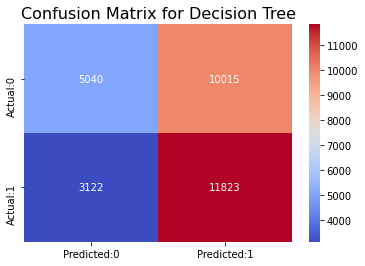

In [66]:
plot_conf_mat(y_test, y_pred_dt, "Confusion Matrix for Decision Tree")


In [73]:
f2 = round(f1_score(y_test, y_pred_dt, average = 'weighted'), 2)
print("DT F1-score: %.2f" % f2 )

DT F1-score: 0.54


## Random Forest

In [74]:
rdf_cl = RandomForestClassifier(n_estimators=300, random_state=0)
rdf_cl.fit(X_train, y_train)
y_pred_rdf = rdf_cl.predict(X_test)

rdf_cl

RandomForestClassifier(n_estimators=300, random_state=0)

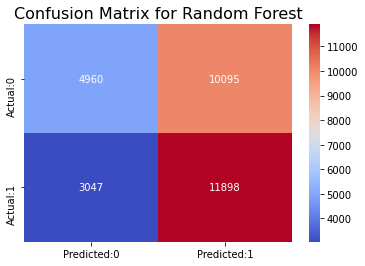

In [75]:
plot_conf_mat(y_test, y_pred_rdf, "Confusion Matrix for Random Forest")

In [78]:
f3 = round(f1_score(y_test, y_pred_rdf, average = 'weighted'), 2)
print("DT F1-score: %.2f" % f3 )

DT F1-score: 0.54
